In [ ]:
import statsmodels.stats.proportion as proportion
import numpy as np

### Задача 1 (1 балл)

Руководитель продукта, у которого имеется АБ-платформа, хочет выяснить, стоит ли инвестировать ресурсы в ускорение своего продукта. Как ему сделать это с минимальными трудозатратами?

Видимо тут ожидается описание флоу реализации аб теста.

1. Определить метрику, которая отражает необходимый показатель скорости (может быть несколько метрик). Если необходимо - внести новые метрики в платформу
2. Сформулировать гипотезу (односторонняя или двусторонняя - от этого зависит подсчет статистики)
3. Определить сегменты пользователей, на которых будет катиться тест, то есть необходимо обозначить контрольную и тестовую группы, но при этом важно убедиться, что пользователи будут распределены в случайном порядке
4. Определить уровень статистической значимоти (стандартно 5% или 1%)
5. С помощью калькулятора посчитать размер выборки и временные рамки
6. Ну и наконец провести эксперимент, главное не подглядывать:)

**Mistake:** Тут ожидался ухудшающий  A/B  тест

### Задача 2 (2 балла)

Аналитик решил протестировать два вида баннеров A и B. По ходу АБ-эксперимента по n пользователей увидело баннер А и B. В группе A конверсия составила 56%, а в группе B 59%. При каких n можно считать, что в группе B на уровне значимости в 0.1% действительно выше конверсия?

Для начала немного переформулируем нашу задачу. Давайте обозначать результат взаимодействия пользователя с баннером за 1, если он кликнул на него (или совершил другое целевое действие). В противном случае это будет 0. Тогда конверсия будет определяться как среднее значение контакта пользователя с баннером.

Теперь можем определить нулевую и альтернативную гипотезы.

*H0: среднее значение в группе А = среднее значение в группе Б*

*H1: среднее в группе Б выше чем в группе А (одностороння гипотеза)*

Для сравнения средних будем использовать Z-статистику.

Посчитае выборочную дисперсию и экстраполируем ее на генеральную совокупность (на больших выборках они должны быть примерно равны).

$Var_{A} = 0.56 * 0.44$

$Var_{B} = 0.59 * 0.41$

$Z-stat = \frac{0.56 - 0.59}{\sqrt{(Var_{A} + Var_{B}) / n}}$

Z-stat - это табличное значение для уровня значимости 0.001. Значит мы можем выразить n (смотри код ниже)

In [ ]:
VarA = 0.56 * 0.44
VarB = 0.59 * 0.41

a, b = 0.56, 0.59

import scipy.stats
z_stat = scipy.stats.norm.ppf(0.001) # получим значение для левостороннего теста

n = z_stat ** 2 * (VarA + VarB)/ ((a - b) ** 2)
n

5181.153650311636

**Ответ: 5181**

Проверим наш ответ через библиотечку statsmodels.stats

In [ ]:
n = 5181
control_users = n
test_users = n
trials = np.array([control_users, test_users])
control_conversion = 0.56
test_conversion = 0.59
success = np.array([round(control_users * control_conversion), round(test_users * test_conversion)])

stat, pvalue = proportion.proportions_ztest(success, trials, alternative='smaller')
#  In the two sample test, smaller means that the alternative hypothesis is p1 < p2 and larger means p1 > p2 where p1 is the proportion of
# the first sample and p2 of the second one.
alpha = 0.001 # зададим уровень значимости 0,1 проценто
print(pvalue, stat)
print('Можем отклонить нулевую гипотезу? ', pvalue < alpha)

0.0009673515413683695 -3.100077048009965
Можем отклонить нулевую гипотезу?  True


### Задача 3 (3 балла)

Аналитик собирается провести эксперимент с добавлением фичи на 14 дней с p-value 5%. То есть в 5% случаев, если на самом деле нет изменений, то фичу будут выкатывать. Аналитик очень нетерпеливый, и любит [подглядывать](https://gopractice.ru/data/how-not-to-analyze-abtests) (рассчитывает стат. значимость каждый день эксперимента). Как только в какой-то день p-value оказывается ниже 5%, он собирается остановить эксперимент и выкатить фичу.

* Посчитайте 99% доверительный интервал для количества AA экспериментов из 1000, которые должны иметь p-value 5%. (1 балл)
* Посчитайте на синтетическом примере в какой доле AA экспериментов аналитик отвергнет нулевую гипотезу, если будет подглядывать. Другими словами какая реальная ошибка первого рода. (1 балл)
* Какое p-value нужно использовать при "подглядывании", чтобы итоговая ошибка первого рода составила 5%? (1 балл)

In [ ]:
scipy.stats.norm.ppf(0.995)

2.5758293035489004



---


Чтобы рассчитать 99% доверительный интервал для этого количества, мы можем использовать формулу для доверительного интервала для биномиального распределения.
$Var_{A} = 0.56 * 0.44$

Пусть $p = 0.05, n = 1000, z = 2.58$ (значение для 99% доверительного интервала).

Тогда ожидаемое значение $E = np$, и стандартное отклонение $Std = \sqrt{np(1-p)}$.

Таким образом, 99% доверительный интервал будет от $E - z * Std$ до $E + z * Std$

In [ ]:
p=0.05
n=1000
z=2.58
E = n * p
Std = np.sqrt(n * p * (1 - p))

print(E - z * Std, E + z * Std)

32.24614520730779 67.75385479269221


Итак, с 99% уверенностью мы можем сказать, что количество AA экспериментов из 1000, которые имеют p-value меньше 5%, будет в диапазоне от 32 до 68.

0.063

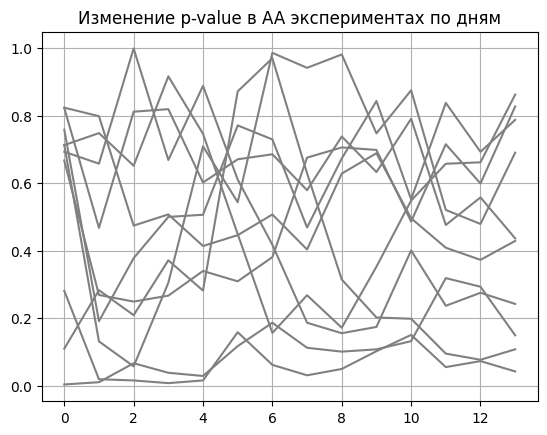

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np

p_value_bound = 0.05
np.random.seed(182)

def generate_p_values_by_day(N=1000, samples_per_day=100, days=14):
    data = []

    for i in range(N):
        test = np.array([])
        control = np.array([])
        p_values = []
        for day in range(days):
            test = np.hstack([test, np.random.randn(samples_per_day)])
            control = np.hstack([control, np.random.randn(samples_per_day)])
            p_value = ttest_ind(test, control, equal_var=False).pvalue
            p_values.append(p_value)
        data.append(p_values)

    return pd.DataFrame(data).T

df = generate_p_values_by_day()
df[list(range(10))].plot(legend=False, color='grey', grid=True, title='Изменение p-value в AA экспериментах по дням')
(df.loc[13] < p_value_bound).sum() / df.shape[1]

В примере выше запускается 1000 AA экспериментов. В 0.063 доле случаев на 14 день p-value оказывается меньше 5%.

In [ ]:
df.head() # столбец - ень эксперимента, колонка - номер эксперимента, пересечение - значение p-value

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.712647,0.280851,0.003298,0.692994,0.109240,0.823772,0.822744,0.666948,0.758624,0.713329,...,0.983282,0.704380,0.164442,0.428754,0.978564,0.928768,0.587519,0.379916,0.021721,0.113574
1,0.748329,0.018854,0.010063,0.657788,0.282775,0.798428,0.467493,0.268609,0.190828,0.130919,...,0.775465,0.521478,0.516597,0.764601,0.943025,0.772872,0.218248,0.398501,0.034081,0.102878
2,0.651636,0.015274,0.066314,0.999138,0.208712,0.474203,0.811732,0.248974,0.377670,0.056954,...,0.734879,0.384807,0.602616,0.267744,0.668610,0.812308,0.397419,0.215488,0.110485,0.162522
3,0.916442,0.007259,0.037963,0.668643,0.371285,0.507270,0.819318,0.266567,0.499914,0.304665,...,0.996303,0.456238,0.945940,0.302651,0.248572,0.590481,0.098556,0.274605,0.189682,0.340362
4,0.746245,0.015253,0.028504,0.888135,0.281548,0.413670,0.601744,0.339683,0.506309,0.709104,...,0.618336,0.636096,0.757605,0.291441,0.200536,0.403013,0.126303,0.333868,0.633269,0.247989


In [ ]:
cnt_sad = 0
for col_name in df.columns:
  test_res = (df[col_name] < 0.05).any()
  if test_res:
    cnt_sad += 1

print(f'Доля AA экспериментов, в которых аналитик отвергнет нулевую гипотезу, если будет подглядывать = {cnt_sad / 1000}')

Доля AA экспериментов, в которых аналитик отвергнет нулевую гипотезу, если будет подглядывать = 0.244


Ничего не мешает нам перебрать несколько значений p-value и определить, при каком ошибка первого рода будет меньше либо равна 5%

In [ ]:
for p in range(1, 10, 1):
  cnt_sad = 0
  for col_name in df.columns:
    test_res = (df[col_name] < (p / 1000)).any()
    if test_res:
      cnt_sad += 1

  print(p/1000, cnt_sad / 1000)

0.001 0.008
0.002 0.012
0.003 0.023
0.004 0.027
0.005 0.034
0.006 0.039
0.007 0.043
0.008 0.052
0.009 0.055


In [ ]:
for p in range(770, 800, 1):
  cnt_sad = 0
  for col_name in df.columns:
    test_res = (df[col_name] < (p / 100000)).any()
    if test_res:
      cnt_sad += 1

  print(p/1000, cnt_sad / 1000)

0.77 0.048
0.771 0.048
0.772 0.048
0.773 0.048
0.774 0.048
0.775 0.048
0.776 0.048
0.777 0.048
0.778 0.048
0.779 0.048
0.78 0.048
0.781 0.048
0.782 0.048
0.783 0.048
0.784 0.049
0.785 0.05
0.786 0.05
0.787 0.05
0.788 0.05
0.789 0.05
0.79 0.051
0.791 0.051
0.792 0.051
0.793 0.051
0.794 0.051
0.795 0.051
0.796 0.051
0.797 0.051
0.798 0.052
0.799 0.052


Получаем, что значение 0,795 нам подходит.

Перебор это, конечно, хорошо, но не очень красиво. Нашла в [статье](https://habr.com/ru/companies/uchi_ru/articles/500918/), что есть пара методов для нормализации p-value при подглядывании. Правда они подходят для одного теста, не очень понятно как это экстраполировать на наше множество


### Задача 4 (3 балла)

Будем называть чувствительностью метрики долю экспериментов со стат. значимым изменением метрики. В синтетическом примере ниже среди 1000 AB тестов метрика количества действий на пользователя прокрашивается в 15.8% случаев на уровне значимости 5%. В сгенерированных данных также присутствуют данные до эксперимента по каждому пользователю (time_interval = 'before_exp').

* Проверьте, что в AA тестах (когда эффект нулевой) красятся около 5% экспериментов. (1 балл)
* Постройте корректную метрику с большей чувствительностью и оцените чувствительность. (2 балл)

In [ ]:
def generate_data(N=50, effect=1):
    hidden_users_param_control = 5 * np.random.exponential(size=N)
    hidden_users_param_test = 5 * np.random.exponential(size=N)

    return (
        pd.DataFrame({
            'sample_group': np.hstack([
                np.repeat('control', N),
                np.repeat('control', N),
                np.repeat('test', N),
                np.repeat('test', N),
            ]),
            'time_interval': np.hstack([
                np.repeat('before_exp', N),
                np.repeat('exp', N),
                np.repeat('before_exp', N),
                np.repeat('exp', N),
            ]),
            'user_id': np.hstack([
                np.arange(N),
                np.arange(N),
                np.arange(N, 2 * N),
                np.arange(N, 2 * N)
            ]),
            'actions': np.random.poisson(np.hstack([
                hidden_users_param_control,
                hidden_users_param_control,
                hidden_users_param_test,
                hidden_users_param_test + effect,
            ]))
        })
    )

def calc_sensitivity(exp_count=1000, p_value=0.05, effect=1, seed=182):
    np.random.seed(seed)
    p_values = []
    for _ in range(exp_count):
        data = generate_data(effect=effect)
        test_metric = data.query('time_interval == "exp" and sample_group == "test"')['actions']
        control_metric = data.query('time_interval == "exp" and sample_group == "control"')['actions']
        p_values.append(ttest_ind(test_metric, control_metric, equal_var=False).pvalue)
    return sum(p < p_value for p in p_values) / exp_count

calc_sensitivity(effect=1)

0.158

In [ ]:
calc_sensitivity(effect=0) # ну как бы все функции уже написаны, красится действительно примерно 5% экспериментов

0.056


Ничего не понятно, но очень интересно
---

надо было садиться не в последний день, но кто ж знал, что так будет